# COS3a Übung 5
---
Abgabe bis 15.11.2022 12:00 Uhr

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Tutorial

### While-Schleifen

Wenn unklar ist, wie oft eine Schleife durchgeführt werden soll, um ein bestimmtes Ergebnis zu erhalten, lässt sich eine *while*-Schleife verwenden. Diese läuft solange eine bestimmte Bedingung erfüllt ist:

In [ ]:
i = 0
while i < 10:
    print(i)
    i += 1
print("fertig")

Vor dem ersten Durchlaufen und nach jeder Iteration wird überprüft, ob die Bedingung `i < 10` erfüllt ist. Solange dies der Fall ist, läuft die Schleife. Der obige Code ist ähnlich zu der *for*-Schleife aus der ersten Übung. Jedoch muss hier die Variable `i` innerhalb des Schleifenkörpers inkrementiert werden. 

Dieses einfache Beispiel soll die Funktionsweise demonstrieren, stellt allerdings keine gute Anwendung dar, weil hierfür die *for*-Schleife angemessener ist. Ein besseres Beispiel ist das Überprüfen der Konvergenz eines Algorithmus:

In [ ]:
pi = 0
hits = 0
misses = 0

genauigkeit = 0.0001

while np.abs(pi-np.pi) > genauigkeit:
    x = random.random()
    y = random.random()
    if x**2 + y**2 <= 1:
        hits += 1
    else:
        misses += 1
    pi = hits/(misses+hits)*4

iterationen = misses + hits
print(f"Der Algorithmus brauchte {iterationen} Iterationen für eine Genauigkeit von {genauigkeit}.")

### Mehr über Listen

#### Vertauschen von Werten

Möchten Sie die Werte zweier Variablen oder Listeneinträge vertauschen, können Sie dies wie folgt erreichen:

In [ ]:
a = 5
b = 10
a, b = b, a
print(a, b)

In [ ]:
l = [1, 2]
l[0], l[1] = l[1], l[0]
print(l)

## Übung

### Aufgabe 11 (2 Punkte)

#### a)

In dieser Aufgabe sollen Sie über den Metropolis Monte Carlo Algorithmus die Gleichgewichtsenergie einer 1D-Lösung bestehend aus zwei Spezien **A** und **B** berechnen. Die Lösung soll hierbei folgenden Eigenschaften aufzeigen:

1. Die Lösung soll eine eindimensionale Kette an Teilchen sein.
2. Jede Position die sich hieraus ergibt soll durch **A** oder **B** besetzt sein.
3. Die beiden Spezien wechselwirken lediglich mit ihren direkten Nachbarn. Das heißt, dass jedes Teilchen mit zwei anderen Teilchen wechselwirkt. 
4. Es sollen periodische Randbedingungen gelten. Das Teilchen, das ganz rechts sitzt, soll also mit dem Teilchen auf der ganz linken Seite wechselwirken.

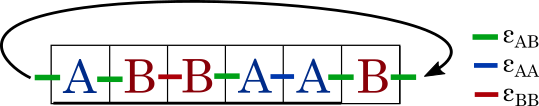

Die folgenden Parameter sind für Ihre Simulation wichtig:

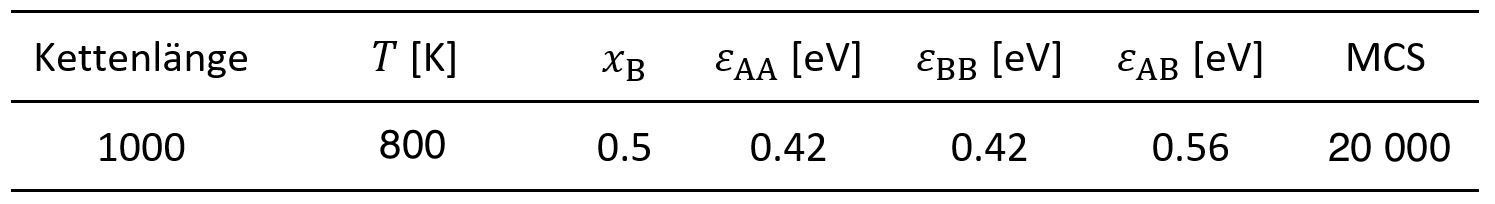

hierbei ist $T$ die Temperatur, $x_\mathrm{B}$ der Stoffmengenanteil von **B** im System, $\varepsilon_{ij}$ die Wechselwirkungsparameter für **A-A**, **A-B** und **B-B** und MCS die Anzahl an abzuschließenden Systemveränderungen bevor die Simulation abbricht. $x_\mathrm{B}$ darf in hier als grob betrachtet werden.

**Aufgabe:** Simulieren Sie dieses System und stellen Sie den Energieverlauf mit zunehmender MCS grafisch dar. Speichern Sie hierfür die Energie nach jedem MCS.

**Hinweis**: Die Berechnung der Gitterenergie wurde bereits für Sie in der Funktion `calc_lattice_energy` definiert. Als Parameter nimmt die Funktion ihr Gitter als 1D Liste an und gibt die Energie zurück. 

**Programmieranleitung:**

1. Definieren Sie die noch die gesetzten Variablen.


2. Definieren Sie das 1D Ausgangsgitter. **Verwenden Sie 0 für A und 1 für B!** (Die Teilchenkette lässt sich als Liste darstellen. Da es genügt den Stoffmengenanteil grob zu erreichen, kann über die `random.choice` Funktion eine Liste mit etwa der gleichen Anzahl an **A** und **B** erzeugt werden.)


3. Definieren Sie eine 'mcs'-Variable, die die abgeschlossenen Vertauschungen aufzeichnet. 


4. Erzeugen Sie eine leere Liste, in welcher der Energieverlauf aufgezeichnet wird. 


5. Berechnen Sie die Anfangsenergie des Systems $E^{(1)}$ mit der `calc_lattice_energy` Funktion.
    
    
6. Formulieren Sie nun eine 'while'-Schleife, die solange laufen soll, bis die gewünschte Anzahl an *mcs* erreicht ist. 
    
    
7. Suchen Sie zufällig zwei Positionen aus. 
       
    
8. Vertauschen Sie die Einträge der beiden gewählten Positionen.
    
    
9. Berechnen Sie die neue Energie des Systems $E^{(2)}$.
    
    
10. Überprüfen Sie nun mithilfe von $\exp\left(-\frac{E^{(2)}-E^{(1)}}{k_\mathrm{B}\cdot T}\right) > Z$, ob der Sprung angenommen wird oder nicht. $Z$ ist eine zufällige Gleitkommazahl zwischen 0 und 1.
    
    * Falls der Sprung angenommen wird, aktualisieren Sie die Gitterenergie und die erhöhen Sie die *MCS*. Ergänzen Sie die Energieverlaufsliste.
        
    * Falls der Sprung nicht angenommen wurde, müssen die Atome wieder zurückgetauscht werden.
 

11. Zurück zu 4. (Bzw. Abbruch der while-Schleife falls gewünschte *mcs* erreicht wurden.)

**Hinweis**: Achten Sie darauf die Boltzmann-Konstante in den richten Einheiten zu verwenden!

In [ ]:
# Definition der Energievariablen
e_aa = 0.42
e_bb = 0.42
e_ab = 0.56
energy_table = [e_aa, e_ab, e_bb]

# Funktion zur Berechnung der Gitterenergie
def calc_lattice_energy(lattice):
    energy = 0 # Energie des Systems
    size = len(lattice)
    for i in range(size):
        # überprüfen wo Nachbarn sitzen unter berücksichtigung periodischer Randbedingung
        neighbor1_pos = (i - 1) % size
        neighbor2_pos = (i + 1) % size
        neighbor1 = lattice[neighbor1_pos]
        neighbor2 = lattice[neighbor2_pos]

        # Energieberechnung
        entry = lattice[i]
        for neighbor in [neighbor1, neighbor2]:
            energy += energy_table[entry + neighbor]/2
    return energy

In [ ]:
# Beispiel für Energieberechnung des Gitters
calc_lattice_energy([0,0,0,1,1,0,1,1])

In [ ]:
# Schreiben Sie hier die Simulation.

In [ ]:
# Stellen Sie hier den Energieverlauf grafisch dar.

#### b)

Welche thermodynamische Zustandsgröße wird minimiert?

Antwort: (Doppelklick zum Bearbeiten)

#### c)

Welchen Vorteil bietet der Metropolis Monte Carlo Algorithmus im Vergleich zum zufälligen Würfeln von Gittern?

Antwort: (Doppelklick zum Bearbeiten)